In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix ,accuracy_score,classification_report
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from skopt.space import Integer, Real,Categorical
from time import time
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score

In [2]:
df = pd.read_csv("dataset.csv")

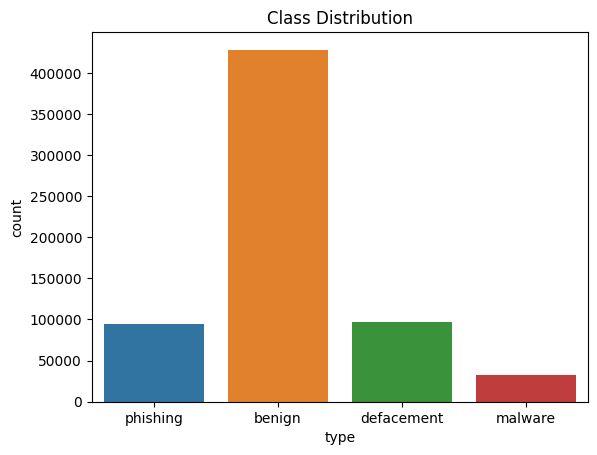

In [3]:
sns.countplot(x=df['type'])
plt.title("Class Distribution")
plt.show()

In [4]:
def url_length(url):
    return len(str(url)) if url else 0

def domain_length(url):
    try:
        return len(urlparse(str(url)).netloc) if url else 0
    except Exception as e:
      return 0
def count_dots(url):
    return str(url).count('.') if url else 0

def count_dashes(url):
    return str(url).count('-') if url else 0

def count_underscores(url):
    return str(url).count('_') if url else 0

def count_slashes(url):
    return str(url).count('/') if url else 0

def count_ques(url):
    return str(url).count('?') if url else 0

def count_non_alphanumeric(url):
    return sum(1 for char in str(url) if not char.isalnum()) if url else 0

def count_digits(url):
    return sum(1 for char in str(url) if char.isdigit()) if url else 0

def count_letters(url):
    return sum(1 for char in str(url) if char.isalpha()) if url else 0

def count_params(url):
    return str(url).count('&') + str(url).count('=') if url else 0

def has_php(url):
    return 1 if 'php' in str(url).lower() else 0

def has_html(url):
    return 1 if 'html' in str(url).lower() else 0

def has_http(url):
    return 1 if 'http://' in str(url).lower() else 0

def has_https(url):
    return 1 if 'https://' in str(url).lower() else 0
def has_ip4(url):
    # Regular expression to detect IPv4 addresses (e.g., 192.168.0.1)
    pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    return 1 if re.search(pattern, str(url)) else 0

In [5]:
df['url_length'] = df['url'].apply(url_length)
df['domain_length'] = df['url'].apply(domain_length)
df['count_dots'] = df['url'].apply(count_dots)
df['count_dashes'] = df['url'].apply(count_dashes)
df['count_underscores'] = df['url'].apply(count_underscores)
df['has_ip4'] = df['url'].apply(has_ip4)
df['count_slashes'] = df['url'].apply(count_slashes)
df['count_ques'] = df['url'].apply(count_ques)
df['count_non_alphanumeric'] = df['url'].apply(count_non_alphanumeric)
df['count_digits'] = df['url'].apply(count_digits)
df['count_letters'] = df['url'].apply(count_letters)
df['count_params'] = df['url'].apply(count_params)
df['has_php'] = df['url'].apply(has_php)
df['has_html'] = df['url'].apply(has_html)
df['has_http'] = df['url'].apply(has_http)
df['has_https'] = df['url'].apply(has_https)

In [6]:
df

,url,type,url_length,domain_length,count_dots,count_dashes,count_underscores,has_ip4,count_slashes,count_ques,count_non_alphanumeric,count_digits,count_letters,count_params,has_php,has_html,has_http,has_https
0,br-icloud.com.br,phishing,16,0,2,1,0,0,0,0,3,0,13,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,2,0,1,0,2,0,5,1,29,0,0,1,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,2,0,0,0,3,0,5,1,25,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,3,1,2,0,3,1,18,7,63,7,1,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,2,1,1,0,3,1,14,22,199,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,39,0,3,0,0,0,3,0,6,12,21,0,0,1,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,44,0,2,2,0,0,4,0,8,7,29,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,42,0,2,0,0,0,4,0,6,3,33,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,45,0,2,0,3,0,2,0,9,0,36,0,0,0,0,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

url                       0
type                      0
url_length                0
domain_length             0
count_dots                0
count_dashes              0
count_underscores         0
has_ip4                   0
count_slashes             0
count_ques                0
count_non_alphanumeric    0
count_digits              0
count_letters             0
count_params              0
has_php                   0
has_html                  0
has_http                  0
has_https                 0
dtype: int64

In [9]:
X=df.drop(['url','type'],axis=1)
y=df['type']

In [10]:
X

,url_length,domain_length,count_dots,count_dashes,count_underscores,has_ip4,count_slashes,count_ques,count_non_alphanumeric,count_digits,count_letters,count_params,has_php,has_html,has_http,has_https
0,16,0,2,1,0,0,0,0,3,0,13,0,0,0,0,0
1,35,0,2,0,1,0,2,0,5,1,29,0,0,1,0,0
2,31,0,2,0,0,0,3,0,5,1,25,0,0,0,0,0
3,88,21,3,1,2,0,3,1,18,7,63,7,1,0,1,0
4,235,23,2,1,1,0,3,1,14,22,199,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,39,0,3,0,0,0,3,0,6,12,21,0,0,1,0,0
651187,44,0,2,2,0,0,4,0,8,7,29,0,0,0,0,0
651188,42,0,2,0,0,0,4,0,6,3,33,0,0,0,0,0
651189,45,0,2,0,3,0,2,0,9,0,36,0,0,0,0,0


In [11]:
y

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42,stratify=y)

In [13]:
X_train

,url_length,domain_length,count_dots,count_dashes,count_underscores,has_ip4,count_slashes,count_ques,count_non_alphanumeric,count_digits,count_letters,count_params,has_php,has_html,has_http,has_https
53719,114,10,1,10,0,0,7,0,19,30,65,0,0,0,1,0
308459,128,28,2,1,0,0,4,1,11,12,105,2,0,0,1,0
55420,40,13,3,0,0,0,5,0,9,0,31,0,0,1,1,0
17222,62,0,2,1,6,0,2,0,13,4,45,0,0,0,0,0
292966,47,0,3,0,0,0,3,0,6,3,38,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239381,27,0,3,0,0,0,1,0,4,0,23,0,0,0,0,0
208220,15,0,1,0,0,0,0,0,1,0,14,0,0,0,0,0
463042,45,0,1,1,1,0,3,0,6,6,33,0,0,0,0,0
274257,41,9,3,0,0,0,4,1,9,6,26,0,0,1,1,0


In [14]:
def random_selection(X, y, sample_size=0.271):
    num_samples = int(sample_size * len(X))
    indices = np.random.choice(len(X), num_samples, replace=False)
    return X.iloc[indices], y.iloc[indices]
    
def drlsh_selection(X, y, sample_size=0.5, n_neighbors=10):
    num_samples = int(sample_size * len(X))
    sampled_indices = np.random.choice(len(X), min(150000, len(X)), replace=False)
    sampled_data = X.iloc[sampled_indices]
    nn = NearestNeighbors(n_neighbors=n_neighbors)
    nn.fit(sampled_data)
    distances, indices = nn.kneighbors(sampled_data)
    avg_distances = np.mean(distances, axis=1)
    selected_indices = np.argsort(avg_distances)[:num_samples]    
    return X.iloc[sampled_indices[selected_indices]], y.iloc[sampled_indices[selected_indices]]

def bplsh_selection(X, y, sample_size=0.5, n_neighbors=10):
    num_samples = int(sample_size * len(X))
    sampled_indices = np.random.choice(len(X), min(150000, len(X)), replace=False)
    sampled_data = X.iloc[sampled_indices]
    nn = NearestNeighbors(n_neighbors=n_neighbors)
    nn.fit(sampled_data)
    distances, indices = nn.kneighbors(sampled_data)
    max_distances = np.max(distances, axis=1)
    selected_indices = np.argsort(max_distances)[-num_samples:]
    return X.iloc[sampled_indices[selected_indices]], y.iloc[sampled_indices[selected_indices]]


In [17]:
models_param_grid = {
    'Decision Tree': (
        DecisionTreeClassifier(),{'max_depth': Integer(3, 20),'min_samples_split': Integer(2, 10),'criterion': Categorical(['gini', 'entropy'])}),
}
instance_selection_methods = {
    'Random Selection': random_selection,
    'B Selection (BPLSH)': bplsh_selection,
    'D Selection (DRLSH)': drlsh_selection
}

In [18]:
selected_data = {}
selected_features = {}
mrmr_all_scores = {
    'Random Selection': {},
    'B Selection (BPLSH)': {},
    'D Selection (DRLSH)': {}
}
for name, method in instance_selection_methods.items():
    print(f"\nSelecting instances using: {name}")
    X_sel, y_sel = method(X_train, y_train)
    selected_data[name] = (X_sel, y_sel)
    print(f"Running MRMR on selected instances ({X_sel.shape[0]} rows)...")
    feature_names = X_sel.columns.tolist()
    mi_target = mutual_info_classif(X_sel, y_sel, discrete_features='auto')
    relevance = dict(zip(feature_names, mi_target))
    if 'has_http' in relevance:
        relevance['has_http'] += 0.2
    redundancy = {}
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            f1, f2 = feature_names[i], feature_names[j]
            mi = mutual_info_score(X_sel[f1], X_sel[f2])
            redundancy[(f1, f2)] = mi
            redundancy[(f2, f1)] = mi
    selected = []
    remaining = set(feature_names)
    if 'has_http' in remaining:
        first_feat = 'has_http'
    else:
        first_feat = max(relevance, key=relevance.get)

    selected.append(first_feat)
    remaining.remove(first_feat)
    while remaining:
        scores = {}
        for feat in remaining:
            avg_redundancy = np.mean([
                redundancy.get((feat, sel_feat), 0) for sel_feat in selected
            ])
            mrmr_score = relevance[feat] - avg_redundancy
            scores[feat] = mrmr_score

        best_feat = max(scores, key=scores.get)
        selected.append(best_feat)
        remaining.remove(best_feat)
    selected_features[name] = selected
    mrmr_all_scores[name] = {feat: relevance[feat] for feat in selected}


Selecting instances using: Random Selection
Running MRMR on selected instances (150001 rows)...

Selecting instances using: B Selection (BPLSH)
Running MRMR on selected instances (150000 rows)...

Selecting instances using: D Selection (DRLSH)
Running MRMR on selected instances (150000 rows)...


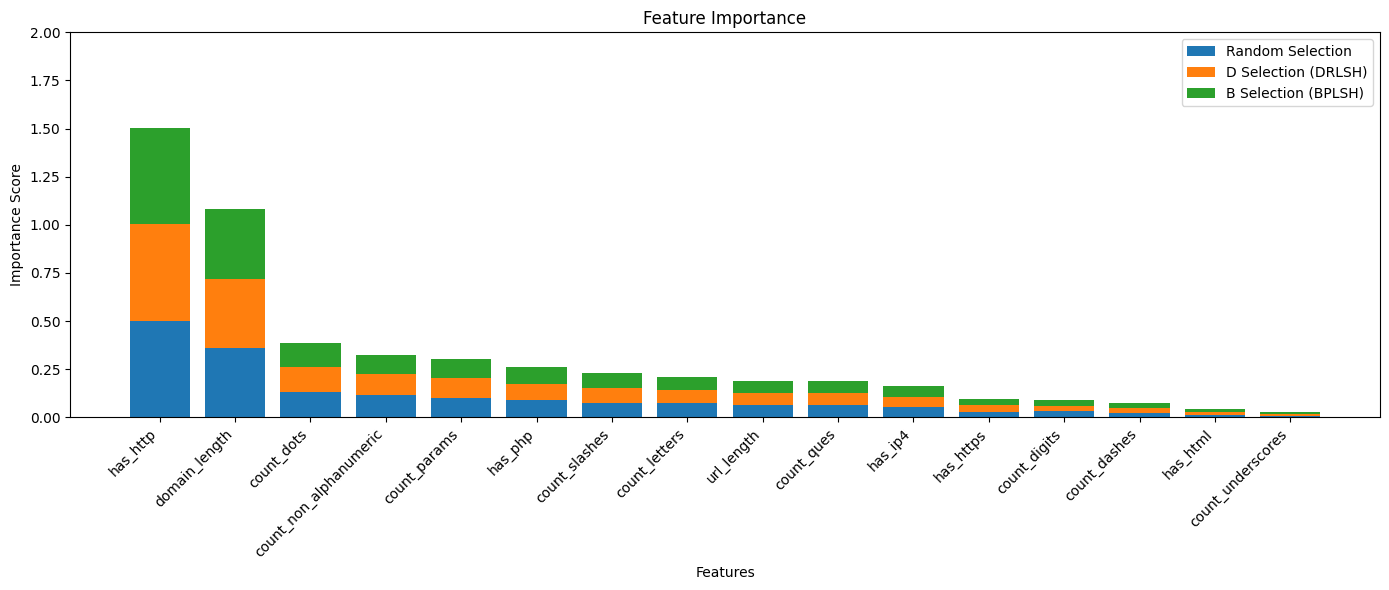

In [19]:
importance_df = pd.DataFrame(mrmr_all_scores)
importance_df['total'] = importance_df.sum(axis=1)
importance_df = importance_df.sort_values(by='total', ascending=False)
importance_df.drop(columns='total', inplace=True)
stack_order = ['Random Selection', 'D Selection (DRLSH)', 'B Selection (BPLSH)']
importance_df = importance_df[stack_order]
fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(importance_df.index))
x = np.arange(len(importance_df.index))
for method in stack_order:
    ax.bar(x, importance_df[method], bottom=bottom, label=method)
    bottom += importance_df[method].values
ax.set_xlabel("Features")
ax.set_ylabel("Importance Score")
ax.set_title("Feature Importance")
ax.set_xticks(x)
ax.set_xticklabels(importance_df.index, rotation=45, ha="right")
ax.set_ylim(0, 2)
ax.legend()
plt.tight_layout()
plt.show()  

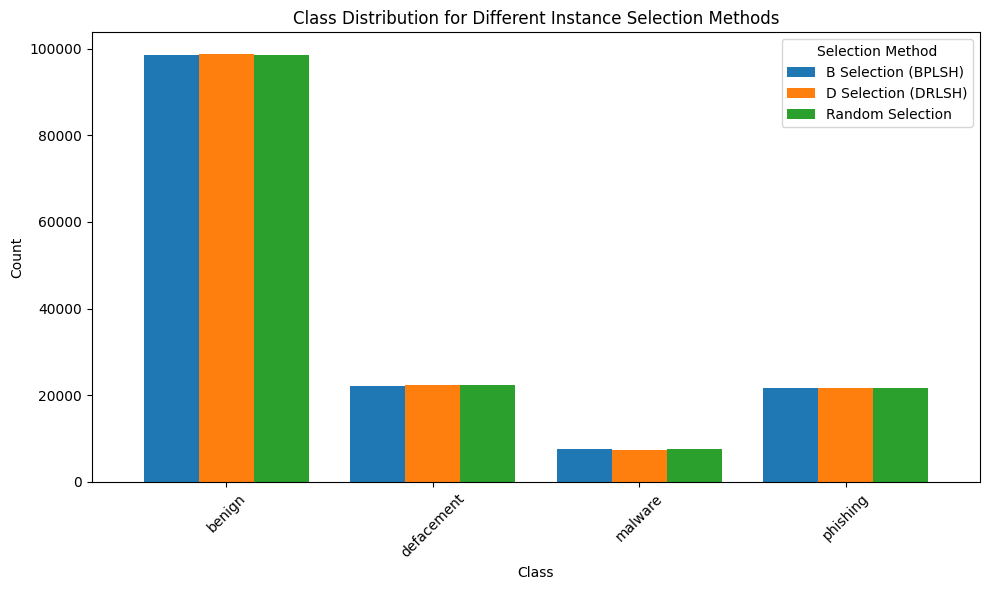

In [20]:
distribution_data = []
for method_name, (_, y_sel) in selected_data.items():
    class_counts = y_sel.value_counts().to_dict()
    for class_name, count in class_counts.items():
        distribution_data.append({'Selection Method': method_name, 'Class': class_name, 'Count': count})

df_distribution = pd.DataFrame(distribution_data)
pivot = df_distribution.pivot_table(index='Class', columns='Selection Method', values='Count', fill_value=0)

pivot.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Class Distribution for Different Instance Selection Methods')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Selection Method')
plt.tight_layout()
plt.show()

In [21]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


Using data selected by: Random Selection
  Training Decision Tree

Decision Tree Training Accuracy    : 0.9544
Training Precision      : 95.20
Training Recall         : 93.28
Training F1 Score       : 94.18

Training Classification Report

              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     98537
  defacement       0.98      0.99      0.99     22320
     malware       0.99      0.96      0.97      7557
    phishing       0.88      0.80      0.84     21587

    accuracy                           0.95    150001
   macro avg       0.95      0.93      0.94    150001
weighted avg       0.95      0.95      0.95    150001

Training Time: 16.2899 seconds
Best Decision Tree parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 19), ('min_samples_split', 3)])


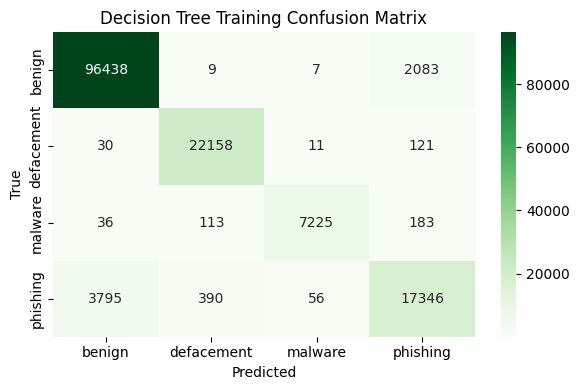


Decision Tree Test Accuracy: 0.9277
Test Precision         : 90.38
Test Recall            : 88.96
Test F1 Score          : 89.63

Test Classification Report

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96     64216
  defacement       0.95      0.97      0.96     14468
     malware       0.93      0.90      0.92      4878
    phishing       0.79      0.72      0.76     14117

    accuracy                           0.93     97679
   macro avg       0.90      0.89      0.90     97679
weighted avg       0.93      0.93      0.93     97679

Best Decision Tree parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 19), ('min_samples_split', 3)])


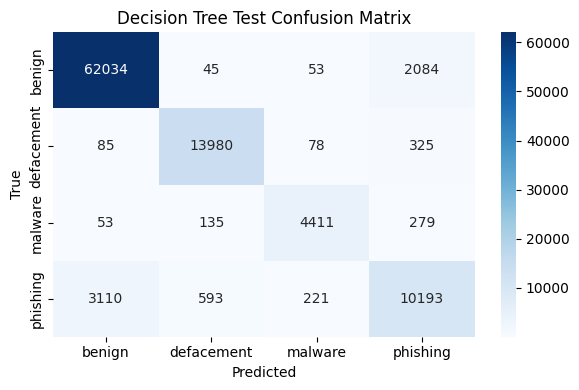


Using data selected by: B Selection (BPLSH)
  Training Decision Tree

Decision Tree Training Accuracy    : 0.9392
Training Precision      : 92.80
Training Recall         : 90.53
Training F1 Score       : 91.57

Training Classification Report

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96     98559
  defacement       0.95      0.98      0.97     22100
     malware       0.96      0.92      0.94      7681
    phishing       0.84      0.75      0.79     21660

    accuracy                           0.94    150000
   macro avg       0.93      0.91      0.92    150000
weighted avg       0.94      0.94      0.94    150000

Training Time: 14.9655 seconds
Best Decision Tree parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 15), ('min_samples_split', 9)])


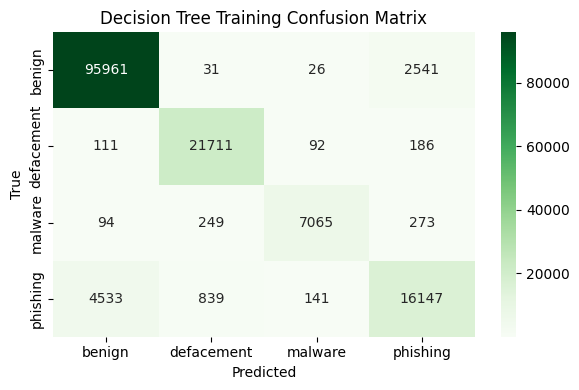


Decision Tree Test Accuracy: 0.9282
Test Precision         : 90.37
Test Recall            : 88.68
Test F1 Score          : 89.45

Test Classification Report

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96     64216
  defacement       0.94      0.97      0.95     14468
     malware       0.92      0.89      0.91      4878
    phishing       0.81      0.72      0.76     14117

    accuracy                           0.93     97679
   macro avg       0.90      0.89      0.89     97679
weighted avg       0.93      0.93      0.93     97679

Best Decision Tree parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 15), ('min_samples_split', 9)])


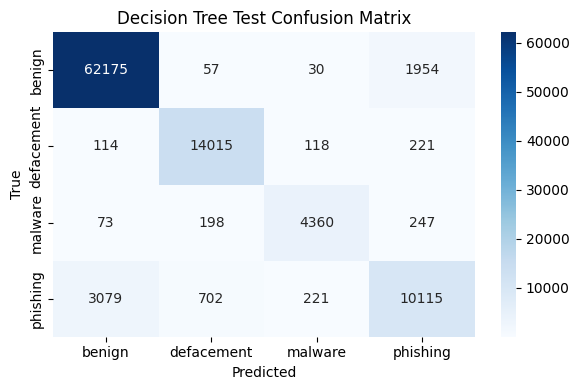


Using data selected by: D Selection (DRLSH)
  Training Decision Tree

Decision Tree Training Accuracy    : 0.9383
Training Precision      : 92.65
Training Recall         : 89.86
Training F1 Score       : 91.16

Training Classification Report

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96     98829
  defacement       0.95      0.98      0.96     22279
     malware       0.97      0.89      0.93      7301
    phishing       0.84      0.75      0.79     21591

    accuracy                           0.94    150000
   macro avg       0.93      0.90      0.91    150000
weighted avg       0.94      0.94      0.94    150000

Training Time: 14.5038 seconds
Best Decision Tree parameters: OrderedDict([('criterion', 'gini'), ('max_depth', 15), ('min_samples_split', 9)])


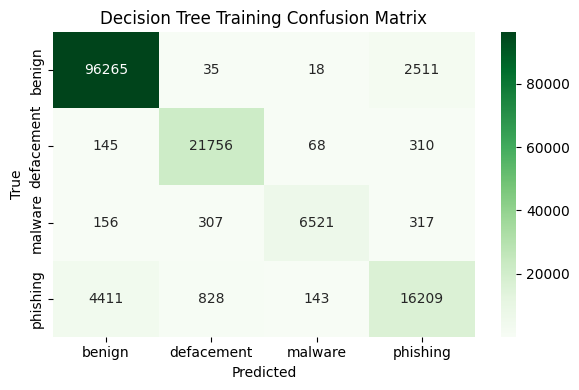


Decision Tree Test Accuracy: 0.9265
Test Precision         : 90.41
Test Recall            : 88.04
Test F1 Score          : 89.14

Test Classification Report

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96     64216
  defacement       0.94      0.96      0.95     14468
     malware       0.93      0.87      0.90      4878
    phishing       0.80      0.72      0.76     14117

    accuracy                           0.93     97679
   macro avg       0.90      0.88      0.89     97679
weighted avg       0.92      0.93      0.92     97679

Best Decision Tree parameters: OrderedDict([('criterion', 'gini'), ('max_depth', 15), ('min_samples_split', 9)])


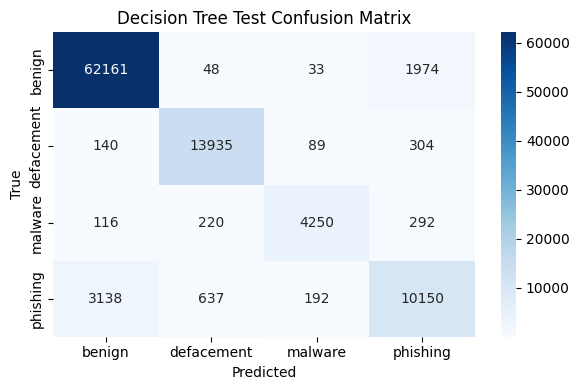

In [23]:
tpr_results = {}
model_results = {}  
average_type = 'macro'

for selection_name, (X_sel, y_sel) in selected_data.items():
    print(f"\nUsing data selected by: {selection_name}")
    tpr_results[selection_name] = {}
    model_results[selection_name] = {}   
    y_sel_encoded = label_encoder.transform(y_sel)

    for model_name, (model, param_grid) in models_param_grid.items():
        print(f"  Training {model_name}")
        search = BayesSearchCV(model, param_grid, n_iter=10, cv=5, scoring='f1_weighted', n_jobs=-1, random_state=42)
        
        start_time = time()
        search.fit(X_sel, y_sel_encoded)
        training_time = time() - start_time

        
        y_train_pred_encoded = search.predict(X_sel)
        y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)
        y_train_true = label_encoder.inverse_transform(y_sel_encoded)
        train_cm = confusion_matrix(y_train_true, y_train_pred)

        print(f"\n{model_name} Training Accuracy    : {accuracy_score(y_train_true, y_train_pred):.4f}")
        print(f"Training Precision      : {precision_score(y_train_true, y_train_pred, average=average_type)*100:.2f}")
        print(f"Training Recall         : {recall_score(y_train_true, y_train_pred, average=average_type)*100:.2f}")
        print(f"Training F1 Score       : {f1_score(y_train_true, y_train_pred, average=average_type)*100:.2f}")
        print("\nTraining Classification Report\n")
        print(classification_report(y_train_true, y_train_pred))
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Best {model_name} parameters: {search.best_params_}")

        plt.figure(figsize=(6, 4))
        sns.heatmap(train_cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"{model_name} Training Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()

        y_pred_encoded = search.predict(X_test)
        predicted_labels = label_encoder.inverse_transform(y_pred_encoded)
        true_labels = label_encoder.inverse_transform(y_test_encoded)
        cm = confusion_matrix(true_labels, predicted_labels)

        print(f"\n{model_name} Test Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}")
        print(f"Test Precision         : {precision_score(true_labels, predicted_labels, average=average_type)*100:.2f}")
        print(f"Test Recall            : {recall_score(true_labels, predicted_labels, average=average_type)*100:.2f}")
        print(f"Test F1 Score          : {f1_score(true_labels, predicted_labels, average=average_type)*100:.2f}")
        print("\nTest Classification Report\n")
        print(classification_report(true_labels, predicted_labels))
        print(f"Best {model_name} parameters: {search.best_params_}")        

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"{model_name} Test Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()

        tpr = cm.diagonal() / cm.sum(axis=1)
        tpr_results[selection_name][model_name] = tpr
        model_results[selection_name][model_name] = search

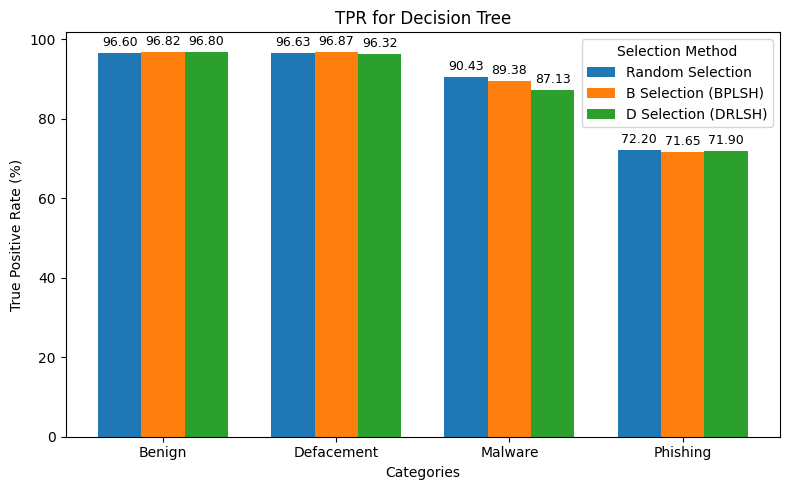

In [25]:
categories = ["Benign", "Defacement", "Malware", "Phishing"]
x = np.arange(len(categories))
width = 0.25
model_names = list(models_param_grid.keys())

for model_name in model_names:
    fig, ax = plt.subplots(figsize=(8, 5))   
    for i, (selection_name, tpr_dict) in enumerate(tpr_results.items()):
        tpr_values = [v * 100 for v in tpr_dict.get(model_name, [0] * len(categories))]  # Convert to percentage
        bars = ax.bar(x + i * width, tpr_values, width, label=selection_name)
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    ax.set_xlabel("Categories")
    ax.set_ylabel("True Positive Rate (%)")
    ax.set_title(f"TPR for {model_name}")
    ax.set_xticks(x + width)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 20)) 
    ax.legend(title='Selection Method')
    plt.tight_layout()
    plt.show()